In [1]:
from __future__  import print_function, division
import os 
from zipfile import ZipFile
import pandas as pd
import pylab as pl
%pylab inline
print ('PUIdata', os.getenv('PUIDATA'))

Populating the interactive namespace from numpy and matplotlib
PUIdata /nfshome/lj1232/PUIdata


# Question:

Do people of different age groups use CitiBike the same?

# Hypotheses:

For the sake of this experiment we will set two age groups and divide the data accordingly.

Age_Group_1 = $G_1$ = [18  to 45 years]

Age_Group_2 = $G_2$ =  [46 to 65 years]

### Significance Level: 
We will conduct a two- tailed test at $\alpha=0.05$, to see if the groups have the same proportion or if not then which group has the bigger one.

### Null Hypothesis: 
The proportion of people using CitiBike and belonging to Age_Group_1 is the same as those belonging to Age_Group_2 in a given month.

### Alternative Hypothesis: 
The proportion of people using CitiBike and belonging to Age_Group_1 is different from those belonging to Age_Group_2 in a given month.


### $H_0$ : $\frac{G_{\mathrm{1}}}{G_{\mathrm{total}}} = \frac{G_{\mathrm{2}}}{G_{\mathrm{total}}}$

### $H_a$ : $\frac{G_{\mathrm{1}}}{G_{\mathrm{total}}} \neq \frac{G_{\mathrm{2}}}{G_{\mathrm{total}}}$



In [2]:
!curl https://s3.amazonaws.com/tripdata/JC-201803-citibike-tripdata.csv.zip > 201803_citibike_tripdata.csv.zip
!mv 201803_citibike_tripdata.csv.zip $PUIDATA


zip = ZipFile('%s/201803_citibike_tripdata.csv.zip'%os.getenv('PUIDATA'))
zip.extractall(os.getenv('PUIDATA'))

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  442k  100  442k    0     0  2351k      0 --:--:-- --:--:-- --:--:-- 2356k


In [3]:
ls $PUIDATA

201803_citibike_tripdata.csv.zip  DOB_Complaints_311.csv           times.txt
dhsdaily.csv                      JC-201803-citibike-tripdata.csv


In [53]:
df = pd.read_csv('%s/JC-201803-citibike-tripdata.csv'%os.getenv('PUIDATA'))

In [54]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,329,2018-03-01 06:37:37.0380,2018-03-01 06:43:06.5520,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29284,Subscriber,1981,1
1,118,2018-03-01 07:37:30.1210,2018-03-01 07:39:28.3910,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29465,Subscriber,1966,1
2,76,2018-03-01 08:26:17.9390,2018-03-01 08:27:34.6770,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29681,Subscriber,1975,1
3,578,2018-03-01 12:10:36.2160,2018-03-01 12:20:14.8690,3183,Exchange Place,40.716247,-74.033459,3185,City Hall,40.717733,-74.043845,31695,Subscriber,1970,1
4,485,2018-03-01 12:21:47.8800,2018-03-01 12:29:53.2990,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,31802,Subscriber,1979,1


In [55]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
17104,239,2018-03-30 21:24:17.9440,2018-03-30 21:28:17.7570,3640,Journal Square,40.73367,-74.0625,3194,McGinley Square,40.725340,-74.067622,29616,Subscriber,1990,1
17105,364,2018-03-31 00:45:26.4970,2018-03-31 00:51:31.4750,3640,Journal Square,40.73367,-74.0625,3212,Christ Hospital,40.734786,-74.050444,26228,Subscriber,1986,2
17106,336,2018-03-31 07:38:32.7490,2018-03-31 07:44:09.0950,3640,Journal Square,40.73367,-74.0625,3207,Oakland Ave,40.737604,-74.052478,31954,Subscriber,1971,1
17107,194,2018-03-31 12:08:09.5080,2018-03-31 12:11:23.7180,3640,Journal Square,40.73367,-74.0625,3201,Dey St,40.737711,-74.066921,29491,Subscriber,1963,1
17108,290,2018-03-31 19:54:45.0990,2018-03-31 19:59:35.3650,3640,Journal Square,40.73367,-74.0625,3207,Oakland Ave,40.737604,-74.052478,31681,Subscriber,1989,1


In [56]:
df.columns, len(df.columns)

(Index(['tripduration', 'starttime', 'stoptime', 'start station id',
        'start station name', 'start station latitude',
        'start station longitude', 'end station id', 'end station name',
        'end station latitude', 'end station longitude', 'bikeid', 'usertype',
        'birth year', 'gender'],
       dtype='object'), 15)

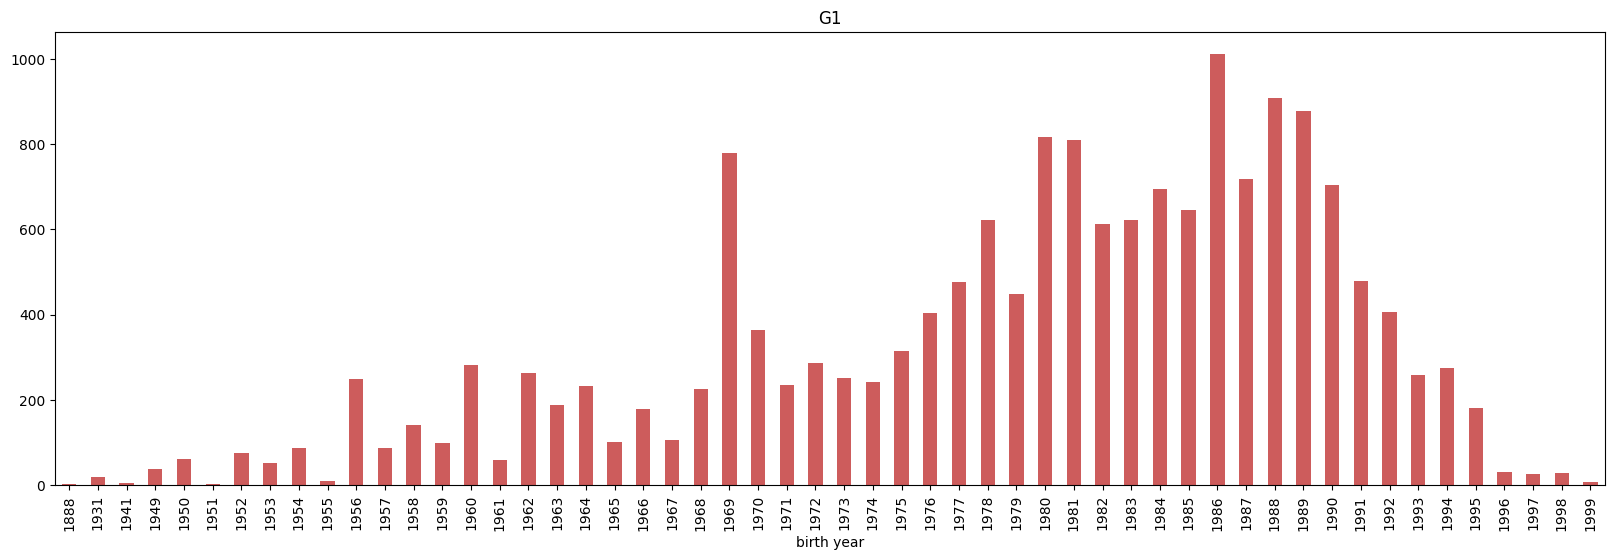

In [168]:
fig = pl.figure(figsize=(20,6), dpi=100)
ax1 = ((df_dob['birth year'].groupby([df_dob['birth year']]).count())).plot(kind="bar", color='IndianRed', title='G1')


In [145]:
df_dob = df[['birth year']]
df_dob.head()

,birth year
0,1981
1,1966
2,1975
3,1970
4,1979


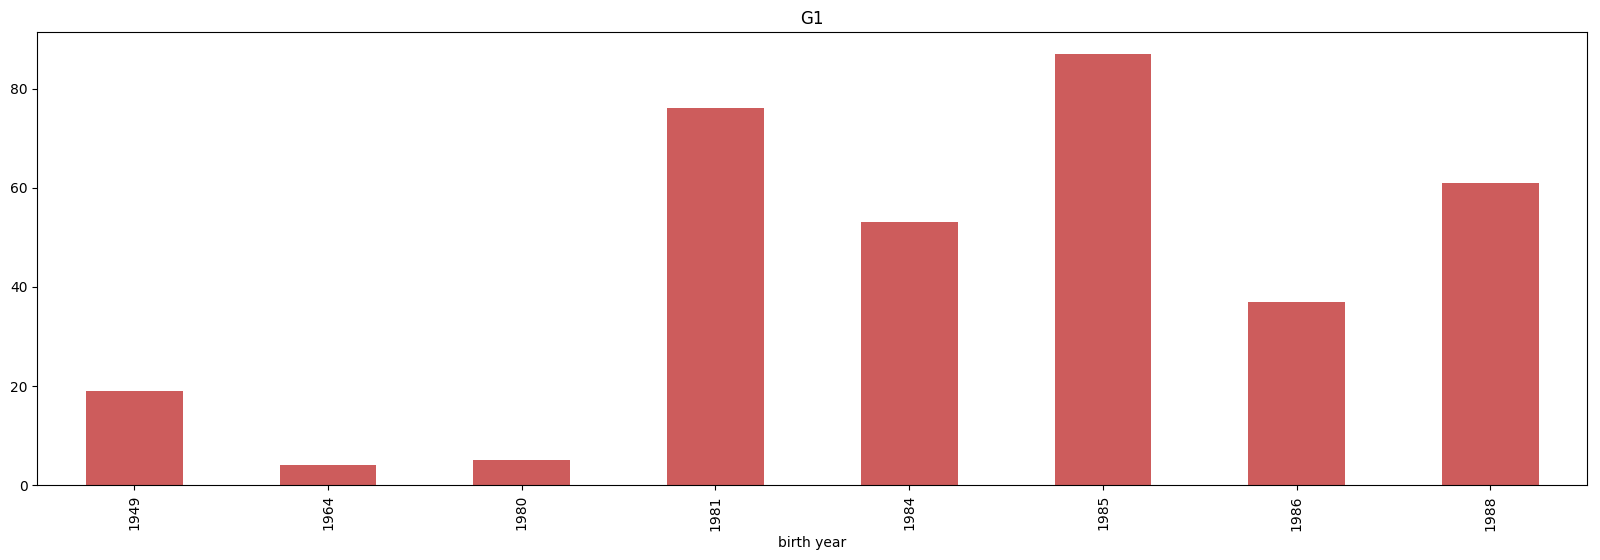

In [162]:
fig = pl.figure(figsize=(20,6), dpi=100)

((df_dob['birth year'][G1].groupby([df_dob['birth year'][G1]]).count())).plot(kind="bar", color='IndianRed', title='G1')

In [155]:
G1 = []
G2 = []
G3 = []
G4 = []
G5 = []

for i in df_dob['birth year']:
    if 1928 <= i <= 1954:
        G1.append(i) 
    if 1946 <= i <= 1964:
        G2.append(i)
    if 1965 <= i <= 1980:
        G3.append(i)
    if 1981 <= i <= 1996:
        G4.append(i)
    if 1997 <= i <= 2018:
        G5.append(i)
        
len(G1), len(G2), len(G3), len(G4), len(G5), type(G1)

(342, 1930, 5852, 9237, 63, list)

In [167]:
sort(G1)

array([1931, 1931, 1931, 1931, 1931, 1931, 1931, 1931, 1931, 1931, 1931,
       1931, 1931, 1931, 1931, 1931, 1931, 1931, 1931, 1941, 1941, 1941,
       1941, 1941, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
       1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
       1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
       1949, 1949, 1949, 1949, 1949, 1949, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1951, 1951, 1951, 1951, 1952, 1952, 1952, 1952, 1952, 1952,
       1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952,
       1952, 1952, 1952, 1952, 1952, 1952, 1952, 19

In [ ]:
for i in G1:
    i.plot

In [15]:
#import numpy as np
G_1 = df_dob['birth year'][G1]
len(G_1), type(G_1)

(342, pandas.core.series.Series)

In [11]:
G_1.count()

342

In [127]:
s = df_dob.sort_values(by='birth year', ascending=True)
s = s.
s.head()

,birth year
7564,1888
3697,1888
7587,1888
14872,1931
14627,1931


In [121]:
s.tail()

,birth year
14749,1999
7175,1999
1152,1999
10137,1999
1520,1999


In [ ]:
len( == 1973)

In [126]:
df_dob['birth year'][0]

1981

In [ ]:
#import numpy as np
index = []
G1_start = (s['birth year'] == 1973).index
index.append(G1_start)

index
#G1 = pd.DataFrame({'birth year' : np.random.randint(1973, 2001)}).set_index(range(8))

#G_1 = df_dob.sort_values(by='birth year')[:2000]
#G_1 = df_dob[G1]
#G_1
#len(G_1)

In [ ]:
s[G1_start].index

In [ ]:
G1_end = s['birth year'] == 1999
df_dob[G1_end].index

In [ ]:
G_1 = df_dob.sort_values(by='birth year')[59:2000]